In [1]:
import pandas as pd
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
maDataFrame = pd.read_csv('data/ecoles-creches-idf.csv')
maDataFrame

,ID,nom,departement,ville,CP,type,NO2_2012,NO2_2013,NO2_2014,NO2_2015,...,PM10_2015,PM10_2016,PM10_2017,PM25_2012,PM25_2013,PM25_2014,PM25_2015,PM25_2016,PM25_2017,geometry
0,0750026W,L'Enseignement par petits groupes (Ecole secon...,75,Paris 15,75015,secondaire,41.316912,42.916257,40.610102,37.182711,...,23.790138,23.077844,21.782889,17.152857,18.637080,14.895546,15.277787,14.806532,13.549347,"c(2.2908106734441, 48.8421565600018)"
1,0750106H,Ecole technologique privée CCIP Centre des For...,75,Paris 20,75020,secondaire,63.683878,60.890328,53.322156,45.804898,...,26.063983,23.803116,23.020608,22.692531,23.629341,18.628494,16.978740,15.434943,14.429643,"c(2.40580700033425, 48.8756657433978)"
2,0750132L,Ecole primaire privée Notre-Dame-Saint Roch,75,Paris 01,75001,primaire,41.507336,41.598420,42.855147,39.286859,...,22.995246,22.400441,20.867075,16.614189,18.142261,14.487745,14.562495,14.134427,12.561472,"c(2.33270615799049, 48.8661396641722)"
3,0750136R,Ecole primaire privée Saint-Sauveur,75,Paris 02,75002,primaire,45.197342,44.280198,45.187931,40.855468,...,23.650961,23.405547,22.650735,17.713481,19.089383,15.433904,15.067306,14.756645,15.118740,"c(2.34734689771536, 48.8668886093452)"
4,0750138T,Ecole primaire privée Sainte Geneviève du Marais,75,Paris 03,75003,primaire,40.109546,39.257252,39.688121,37.249166,...,22.808231,22.049934,20.717201,16.332941,17.645253,14.270936,14.391215,13.911639,12.654443,"c(2.36480092620121, 48.8569700986785)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,12192,Les p tits Cressonets,92,Vaucresson,92420,crèche,25.491322,25.555634,19.527074,22.299624,...,19.869131,17.863178,18.105259,13.803373,15.691174,12.018149,12.517553,11.253802,11.044208,"c(2.16919587783002, 48.8431345916851)"
12526,12193,Les lucioles,92,Rueil-Malmaison,92500,crèche,25.399896,27.425298,23.977558,24.256471,...,19.867671,18.068191,18.478601,14.512460,15.739200,12.129308,12.516633,11.382960,11.271947,"c(2.16847695611124, 48.8776984436972)"
12527,12194,Les coccinelles,92,Clamart,92140,crèche,28.621819,32.504379,26.327555,26.119244,...,20.140374,19.734444,19.531801,14.818853,16.465304,12.801332,12.712096,12.449960,11.889488,"c(2.26667090146341, 48.8064248969638)"
12528,12195,Soyer,92,Neuilly-sur-Seine,92200,crèche,36.340857,38.690607,37.182478,35.686455,...,22.088143,20.719541,20.285548,16.266794,17.210366,13.599715,13.961720,13.089301,12.218995,"c(2.26211365820375, 48.8873574601706)"


# PREPARING DATAFRAME

In [3]:
maDataFrame.columns

Index(['ID', 'nom', 'departement', 'ville', 'CP', 'type', 'NO2_2012',
       'NO2_2013', 'NO2_2014', 'NO2_2015', 'NO2_2016', 'NO2_2017', 'PM10_2012',
       'PM10_2013', 'PM10_2014', 'PM10_2015', 'PM10_2016', 'PM10_2017',
       'PM25_2012', 'PM25_2013', 'PM25_2014', 'PM25_2015', 'PM25_2016',
       'PM25_2017', 'geometry'],
      dtype='object')

In [4]:
# ONLY KEEP ID AND LOCALISATION COLUMN ; MELT PM10 values beacause it is target values
maDataFrame = maDataFrame.melt(['ID','geometry'], ['PM10_2012','PM10_2013','PM10_2014', 'PM10_2015', 'PM10_2016', 'PM10_2017'],'PM10-Année','Valeur')
maDataFrame

,ID,geometry,PM10-Année,Valeur
0,0750026W,"c(2.2908106734441, 48.8421565600018)",PM10_2012,27.311257
1,0750106H,"c(2.40580700033425, 48.8756657433978)",PM10_2012,34.043706
2,0750132L,"c(2.33270615799049, 48.8661396641722)",PM10_2012,27.037523
3,0750136R,"c(2.34734689771536, 48.8668886093452)",PM10_2012,28.331593
4,0750138T,"c(2.36480092620121, 48.8569700986785)",PM10_2012,26.688789
...,...,...,...,...
75175,12192,"c(2.16919587783002, 48.8431345916851)",PM10_2017,18.105259
75176,12193,"c(2.16847695611124, 48.8776984436972)",PM10_2017,18.478601
75177,12194,"c(2.26667090146341, 48.8064248969638)",PM10_2017,19.531801
75178,12195,"c(2.26211365820375, 48.8873574601706)",PM10_2017,20.285548


In [5]:
# CREATE YEAT COLUMN TO REPLACE PM10_YEAR
maDataFrame['Année'] = maDataFrame['PM10-Année'].apply(lambda s: s.split('_')[1])
maDataFrame.drop(columns=['PM10-Année'], inplace=True)
maDataFrame

,ID,geometry,Valeur,Année
0,0750026W,"c(2.2908106734441, 48.8421565600018)",27.311257,2012
1,0750106H,"c(2.40580700033425, 48.8756657433978)",34.043706,2012
2,0750132L,"c(2.33270615799049, 48.8661396641722)",27.037523,2012
3,0750136R,"c(2.34734689771536, 48.8668886093452)",28.331593,2012
4,0750138T,"c(2.36480092620121, 48.8569700986785)",26.688789,2012
...,...,...,...,...
75175,12192,"c(2.16919587783002, 48.8431345916851)",18.105259,2017
75176,12193,"c(2.16847695611124, 48.8776984436972)",18.478601,2017
75177,12194,"c(2.26667090146341, 48.8064248969638)",19.531801,2017
75178,12195,"c(2.26211365820375, 48.8873574601706)",20.285548,2017


In [6]:
def get(s, flag):
    """ Splits Geometry values to get X/Y values"""
    res = re.split('\(|\,|\)',s)
    if flag == 0:
        res = res[1]
    else :
        res= res[2]   
    return float(res)  

In [7]:
# TRANSFROM VIA LAMBDA THE GEOMETRY COLUMN INTO 2 X/Y Column
maDataFrame['X'] = maDataFrame['geometry'].apply(get, args=(0,))
maDataFrame['Y'] = maDataFrame['geometry'].apply(get, args=(1,))
maDataFrame

,ID,geometry,Valeur,Année,X,Y
0,0750026W,"c(2.2908106734441, 48.8421565600018)",27.311257,2012,2.290811,48.842157
1,0750106H,"c(2.40580700033425, 48.8756657433978)",34.043706,2012,2.405807,48.875666
2,0750132L,"c(2.33270615799049, 48.8661396641722)",27.037523,2012,2.332706,48.866140
3,0750136R,"c(2.34734689771536, 48.8668886093452)",28.331593,2012,2.347347,48.866889
4,0750138T,"c(2.36480092620121, 48.8569700986785)",26.688789,2012,2.364801,48.856970
...,...,...,...,...,...,...
75175,12192,"c(2.16919587783002, 48.8431345916851)",18.105259,2017,2.169196,48.843135
75176,12193,"c(2.16847695611124, 48.8776984436972)",18.478601,2017,2.168477,48.877698
75177,12194,"c(2.26667090146341, 48.8064248969638)",19.531801,2017,2.266671,48.806425
75178,12195,"c(2.26211365820375, 48.8873574601706)",20.285548,2017,2.262114,48.887357


In [8]:
# FINAL DATAFRAME FOR BEGINNING STUDY
PM10 = maDataFrame[['X','Y', 'Année','Valeur']]
print(PM10.head())
PM10.describe()

          X          Y Année     Valeur
0  2.290811  48.842157  2012  27.311257
1  2.405807  48.875666  2012  34.043706
2  2.332706  48.866140  2012  27.037523
3  2.347347  48.866889  2012  28.331593
4  2.364801  48.856970  2012  26.688789


,X,Y,Valeur
count,75180.000000,75180.000000,75180.000000
mean,2.353831,48.831532,21.465892
std,0.250610,0.143905,3.340368
min,1.478409,48.135696,13.405192
25%,2.237453,48.779928,19.370361
50%,2.352290,48.852873,21.006657
75%,2.463317,48.914936,23.284913
max,3.466546,49.208257,50.651498


In [9]:
# SPLIT VALUE INTO 4 REGIONNAL DATA SET ASED ON MEAN VALUE OF X & Y
Nord_Ouest = PM10.loc[ (PM10.X<=PM10.X.mean()) & (PM10.Y>=PM10.Y.mean()) ]
Nord_Est = PM10.loc[ (PM10.X>PM10.X.mean()) & (PM10.Y>=PM10.Y.mean()) ]
Sud_Ouest = PM10.loc[ (PM10.X<=PM10.X.mean()) & (PM10.Y<PM10.Y.mean()) ]
Sud_Est = PM10.loc[ (PM10.X>PM10.X.mean()) & (PM10.Y<PM10.Y.mean()) ]
Nord_Est.describe()

,X,Y,Valeur
count,21312.000000,21312.000000,21312.000000
mean,2.501414,48.904962,22.535041
std,0.166376,0.057786,3.148971
min,2.353859,48.831575,14.715932
25%,2.387242,48.860241,20.354994
50%,2.443985,48.887920,22.105777
75%,2.547450,48.940177,24.288296
max,3.426826,49.147292,50.651498


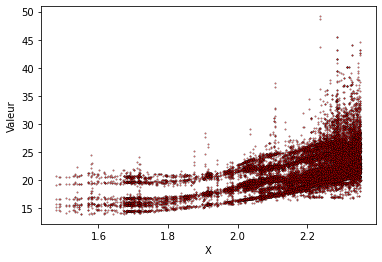

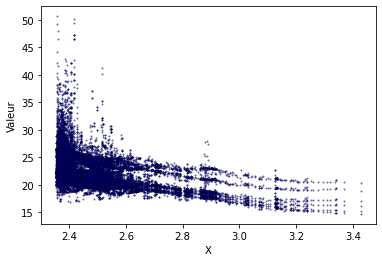

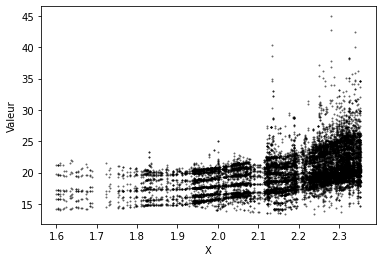

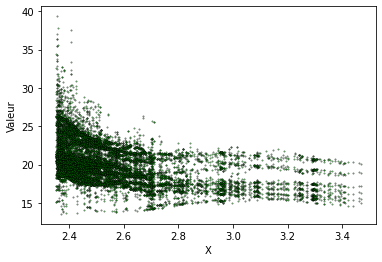

In [10]:
# PLOT DATA
def plotAlldata( points, color):     
    
    points.plot.scatter('X','Valeur',
                       c= color ,s=2,linewidths=0.5,edgecolor='k',alpha=0.5)
    
plotAlldata(Nord_Ouest,'r')
plotAlldata(Nord_Est,'b')
plotAlldata(Sud_Ouest,'k')
plotAlldata(Sud_Est,'g')

In [11]:
# DEFINE REGRESSION MODEL
model = smf.ols(formula='Valeur ~ 1 + X + Y',data=Sud_Est)
res = model.fit()

In [12]:
def plotModel(fit):    
    plotAlldata(Sud_Est,'g')
    pp.scatter(Sud_Est.X, fit.predict(Sud_Est),
               c='r',s=10,linewidths=0.5,edgecolor='k',marker='D')

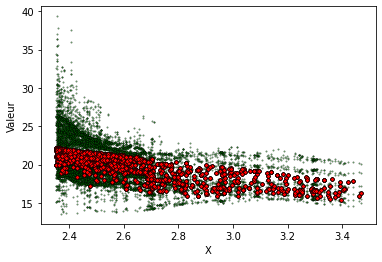

In [13]:
plotModel(res)

In [14]:
res.predict(Sud_Est)

50       22.098794
60       22.089467
81       22.073671
115      22.077765
165      22.112580
           ...    
75069    20.899382
75070    21.015308
75071    21.171381
75078    21.015308
75161    20.902777
Length: 15876, dtype: float64

In [15]:
res.mse_resid

5.148496206019461

In [16]:
res.fvalue

3606.1564648374256